In [13]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import bbknn
import matplotlib.pyplot as plt
sc.settings.verbosity = 0 # 设置全局的waring数量，我这里直接不要求显示
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg',dpi=100)

In [3]:
adata = sc.read_h5ad('../data/v4-sub-fib.h5ad')


In [ ]:
# 用于将样本归为几类，比如AF和NAF，(normal，pre， CRC)
val = []
for x in list(adata.obs['sample']):
    if x.startswith('AF'):
        val.append('AF')
    else:
        val.append('NAF')
adata.obs['sample_group'] = np.array(val) # 重新分组存在sample_group

In [6]:
adata.uns['log1p']['base'] =None
sc.tl.rank_genes_groups(adata, groupby='sample_group')
# # sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [146]:
s1 = 'COMP|CSF1|EFNA5|FGF14|VEGFD|FOXO1|FN1|IGF1|IGF1R|LAMA2|THBS1|THBS4|TNXB|FGF18|PHLPP1'
s2 = 'CDKN1A|COL1A1|COL3A1|COL4A1|COL11A1|FGF10|FN1|TNC|ITGB8|LAMB1|PGF|SLC2A3|THBS4|ITGA10|ITGA8|OSMR|COL5A3|DDIT4'
s3 = 'ANGPT1|COL4A1|FGF7|FGF12|GHR|IGF1R|ITGA7|LAMA2|NGFR|FGF18|ANGPT4'

gene1 = s1.split('|')
gene2 = s2.split('|')
gene3 = s3.split('|')
gene = gene1 + gene2 + gene3
gene = list(set(gene))

In [147]:
sc.pl.dotplot(adata, gene,groupby=['sample_group','leiden_poly'],
                     title='Focal adhesion: PI3K-Akt-mTOR-signaling pathway',
                    save='Focal adhesion: PI3K-Akt-mTOR-signaling pathway',use_raw=True )

AttributeError: 'NoneType' object has no attribute 'var'

In [ ]:
s1 = 'ALCAM|CDH13|EFNA5|CLDN11|ROBO2|TENM1|NLGN1|CADM3|CLSTN2|FAT4|HMCN1|KIRREL3|SDK1|HMCN2'
s2 = 'CDH11|ICAM1|PCDH9|PECAM1|VCAM1|SPARCL1|PTPRT|NTNG1|CADM1|TENM3|HMCN1|FAT3'
s3 = 'PCDH9|ROBO2|SPARCL1|IL1RAPL1|NTNG1|NLGN1|ADGRL3|LRRC4C|LRFN5|CNTN4'

gene1 = s1.split('|')
gene2 = s2.split('|')
gene3 = s3.split('|')
gene = gene1 + gene2 + gene3
gene = list(set(gene))

In [ ]:
sc.pl.dotplot(adata, gene,groupby=['sample_group','leiden_poly'],
                     title='cell-cell adhesion via plasma-membrane adhesion molecules',
                    save='cell-cell adhesion via plasma-membrane adhesion molecules', use_raw=True)

In [ ]:
s1 = 'FOXO1|IGFBP6|SFRP4|DKK3|WWOX|BICC1|APCDD1'
s2 = 'APOE|EGR1|IGFBP4|MDK|MLLT3|CTHRC1|PRICKLE1'
s3 = 'APOE|GPC3|IGFBP4|IGFBP6|PRKN|SFRP1|SFRP2|TMEM131L|TSKU|WWOX|PRICKLE1|APCDD1|SHISA3|AMER2|TRABD2B'

gene1 = s1.split('|')
gene2 = s2.split('|')
gene3 = s3.split('|')
gene = gene1 + gene2 + gene3
gene = list(set(gene))

In [ ]:
sc.pl.dotplot(adata, gene,groupby=['sample_group','leiden_poly'],
                     title='negative regulation of Wnt signaling pathway',
                    save='negative regulation of Wnt signaling pathway', use_raw=True)

In [8]:
adata.uns['log1p']['base'] =None
sc.tl.rank_genes_groups(adata, groupby='sample_group',use_raw=False)
# # sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [11]:
sc.tl.dendrogram(adata,groupby='sample_group')

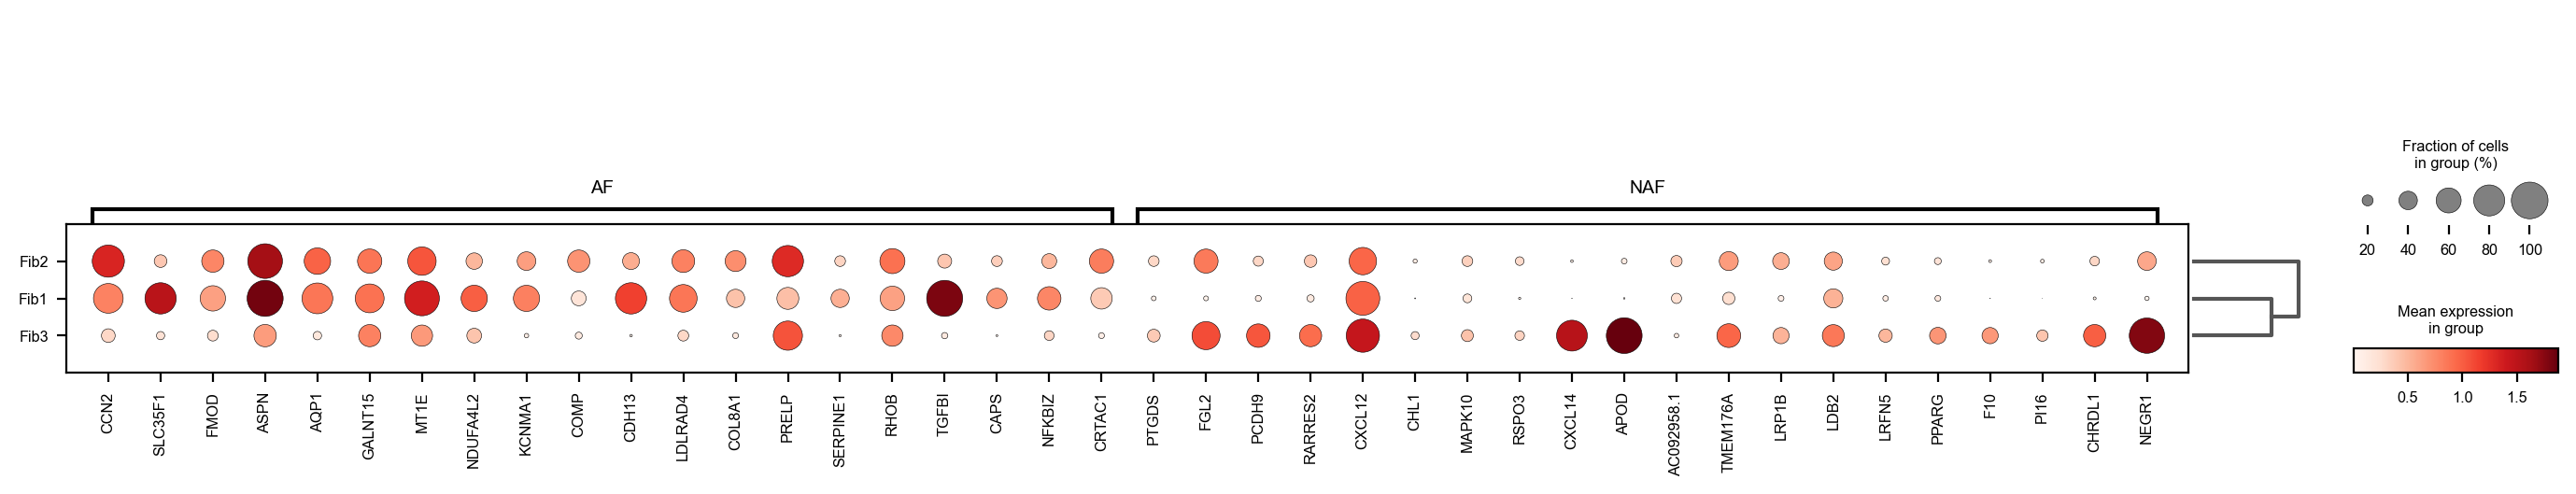

In [12]:
adata.uns['log1p']['base'] =None
sc.tl.rank_genes_groups(adata, groupby='sample_group',use_raw=False)
# # sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=20,groupby='leiden_poly',use_raw=False,)

In [150]:
# 讲计算得到的差异基因输出到excel，或者csv，推荐excel
result1 = adata.uns['rank_genes_groups']
groups = result1['names'].dtype.names
hvgdf = pd.DataFrame(
    {group + '_' + key: result1[key][group]
     for group in groups 
     for key in ['names', 'pvals','logfoldchanges']})
hvgdf.to_excel('./DEG/fib_sample_diff.xlsx')

In [151]:
Deg = ['CCN2','APOD','ASPN','CXCL14','NEGR1']

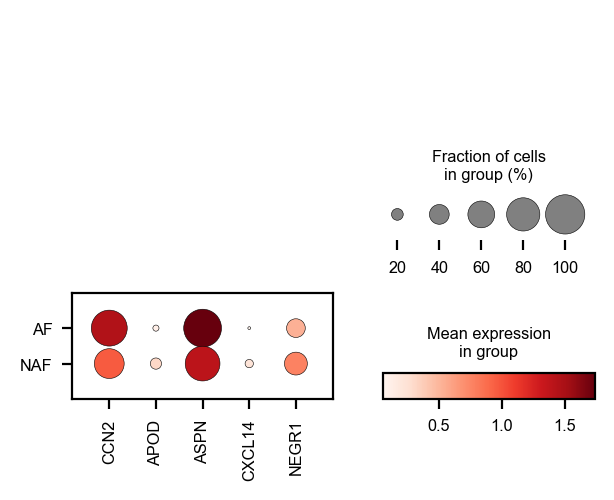

In [152]:
sc.pl.dotplot(adata, Deg, groupby='sample_group',use_raw=False)

In [153]:
sc.tl.dendrogram(adata, groupby='sample_group')

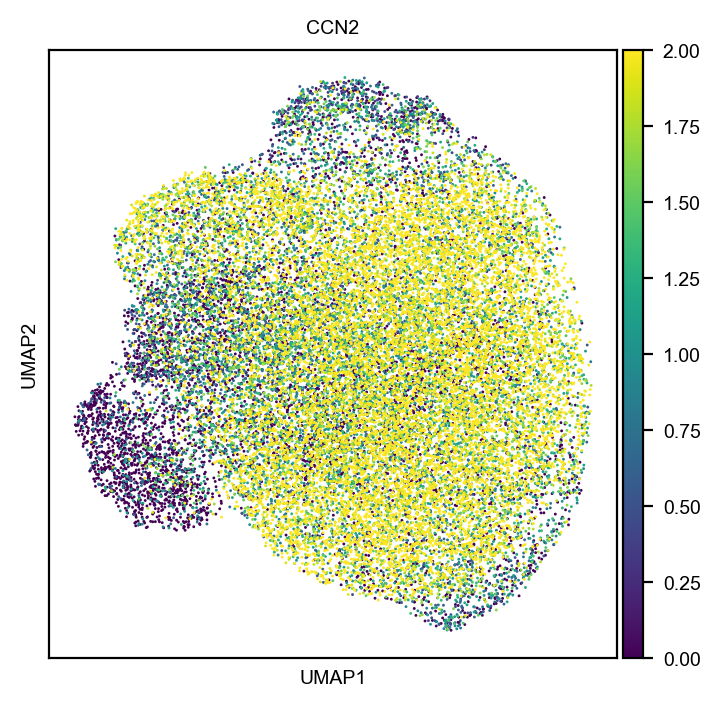

In [154]:
sc.pl.umap(adata,color='CCN2')